# Box and Whisker Plots

In this notebook we look at **boxplots** (McGill, Tukey, and Larsen 1978).  Tukey
is one of the big names in visualization and exploratory data analysis, and
boxplots are an excellent example of exploratory data analysis as Tukey
conceives it:


  >Procedures for analyzing data, techniques for interpreting the results of such procedures,ways of planning the gathering of data to make its analysis easier, more precise or more accurate, and all the machinery and results of (mathematical) statistics which apply to analyzing data.
  
  >Tukey (1962)

Some new data from the web.

This data is about predicting the age of abalone from physical measurements. The age of
abalone can be found reliably by cutting the shell open
and counting the number of rings --- a laborious process. 

Other measurements, which are easier to
obtain, are given in this new data set.
These measurements can be used to predict the age. Further information, such as
location, may be required to solve the problem, so let's remain neutral on whether
we've actually got enough information to solve the problem.
That's pretty normal in data analysis.

We load the information with the help of a `python` module called `pandas`,
which provides a number of facilities for reading, storing, and manipulating
data.  For now let's just note the following:

1.  The file we're reading on the web contains an abalone data set 
    stored in what's known as `.csv` format.  That means each line
    represents a distinct data instance (abalone shell), and provides
    an arbitrary number of attributes of that instance, seperated by commas.
    "CSV" stands for "comma separated values".
2.  In the code below, the `pandas read_csv` function retrieves the data from the URL it's given
    and stores it under the name `abalone` using a special kind of data object called 
    a `data frame`.  More on data frames later.
3.  We print the first and last rows of the data, to give you an idea of what we've got.
    Each abalone shell has 8 numerical attributes and one string attribute ("Sex").  Notice
    that  the numerical attributes are not necessarily comparable.  Some are lengths, 
    some weights.  The last attribute is a count of the number of rings.



In [1]:
import pandas as pd
from pandas import DataFrame
import pylab
#from pylab import *
import matplotlib.pyplot as plot
pd.set_option('display.width',200)

target_url = ("http://archive.ics.uci.edu/ml/machine-"
              "learning-databases/abalone/abalone.data")
#read abalone data.  This file has no column names (header = None),
# so we provide them ourselves.
abalone = pd.read_csv(target_url,header=None, prefix="V")
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whl weight',
                   'Shckd weight', 'Visc weight', 'Shll weight',
                   'Rings']

# Print first few rows of data
print((abalone.head()))
print()
# Print last few rows
print((abalone.tail()))

  Sex  Length  Diameter  Height  ...  Shckd weight  Visc weight  Shll weight  Rings
0   M   0.455     0.365   0.095  ...        0.2245       0.1010        0.150     15
1   M   0.350     0.265   0.090  ...        0.0995       0.0485        0.070      7
2   F   0.530     0.420   0.135  ...        0.2565       0.1415        0.210      9
3   M   0.440     0.365   0.125  ...        0.2155       0.1140        0.155     10
4   I   0.330     0.255   0.080  ...        0.0895       0.0395        0.055      7

[5 rows x 9 columns]

     Sex  Length  Diameter  ...  Visc weight  Shll weight  Rings
4172   F   0.565     0.450  ...       0.2390       0.2490     11
4173   M   0.590     0.440  ...       0.2145       0.2605     10
4174   M   0.600     0.475  ...       0.2875       0.3080      9
4175   F   0.625     0.485  ...       0.2610       0.2960     10
4176   M   0.710     0.555  ...       0.3765       0.4950     12

[5 rows x 9 columns]


We're going to do something called a **box plot** which is an excellent visualization tool that gives a you a feel for how the data attributes are distributed.

The box plot visualization shows how concentrated each attribute is around the mean, and where the outliers are. 

The following **XKCD** web comic ![pic](https://drive.google.com/uc?export=view&id=1oppXKHmASexEO7ZzacoFZ3vUsEsv0L8N)  beautifully illustrates the basic visualization function of a boxplot and is pretty funny to boot.



![xkcd_539.png](attachment:xkcd_539.png)

**xkcd**, sometimes styled **XKCD**, is a webcomic created in 2005 by American author Randall Munroe. Munroe states on the comic's website that the name of the comic is not an initialism, but "just a word with no phonetic pronunciation".

With that preliminary understanding, here's a first stab at visualizing the data:

Text(0.5, 1.0, 'All variables')

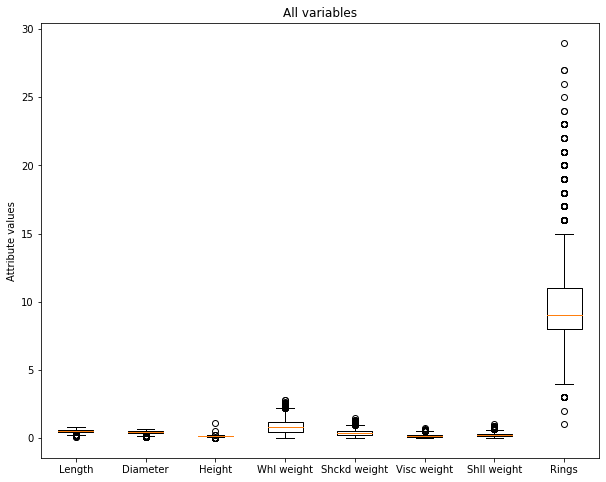

In [2]:
%matplotlib inline
# Make the figures big enough for the optically challenged.
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
#box plot the numerical attributes
#convert data frame to array for plotting
plot_array = abalone.iloc[:,1:9].values
plot.boxplot(plot_array)
# Nice labels using attribute names on the x-axis.
plot.xticks(range(1,9),abalone.columns[1:9])
plot.ylabel(("Attribute values"))
plot.title('All variables')
#show()

The horizontal axis is showing our 8 numerical attributes.  It doesn't take a degree in data science to see that most of the display space is being taken up by the last attribute ('Rings'), which is in fact our representation of age in the data.  That is, it represents the **dependent variable**, the attribute we're trying  to predict. It's out of scale with the others because it takes large integer values and the other attributes all take values below 3, and almost all values fall below 2.

Let's remove it and re-plot.  Since it's the dependent variable, it makes sense to set it aside while we look at the predictors, the independent variables.

Text(0.5, 1.0, 'Independent Variables')

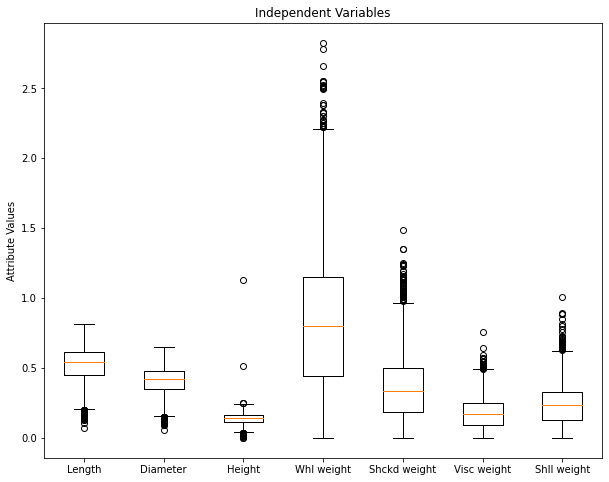

In [3]:
plot_array2 = abalone.iloc[:,1:8].values
plot.boxplot(plot_array2)
plot.xticks(list(range(1,8)),abalone.columns[1:8])
plot.ylabel(("Attribute Values"))
plot.title('Independent Variables')

Before we discuss this picture, it will be helpful to review
something about **Normal** distributions.  Here's a classic diagram of
how population percentages align with STD units in a normal distribtion:

![normal_dist.png](attachment:normal_dist.png)


![normal_dist.png](https://drive.google.com/uc?export=view&id=1yaBMBxJmHeKwlT2crcTsGrQbjd8_oTGS)


In [ ]:
#from IPython.display import Image 
#Image(filename='normal_dist.png')

The meaning of a box in a boxplot can best be rembered by looking at the box
turned on it side in the top half of the diagram.
A boxplot box always contains the 25th-75th percentile, the middle
50% of the population.  The box thus represents IQR (the **inner** quartile range)
in the diagrams of normal distributions above. 

The box usually contains the median, the point that separates the top 50% of the sample values from the bottom 50%.  The red horizontal lines
represent the median values; 
The lines are placed  placed so as to tell you what percentage of the population falls
at or below the median value.  In a normal distribution, it would be in the middle of the 
box, and in some cases in the abalone picture below, it is clearly shifted a bit up or down. The horizontal line at the the end of the
a boxplot (the upper **whisker**) marks 24.675% more of the population above the mean,
and the bottom whisker marks off the same interval **below** the
mean. So, totaling these up, between the top and bottom
horizontal bars, you've got 99.3%
of the population.  Anything outside that interval on either
side (top .35% and bottom .35%) is defined to be an outlier (so the girl in the xkcd comic has a pretty strong case).  If you look back at the upper half the normal distribution diagram above, you can see
what the box and whiskers in a boxplot should look like for a perfectly
normal distribution. 
Since the IQR is the middle 50% of the population (1.349 sigma),
the lower whisker would end at the Q1 - (1.5 * IQR) point [= -2.698 sigma] and the upper whisker would end at the  Q3 + (1.5 * IQR) point [= +2.698 sigma].  

In the boxplot below, each plus above or below those top bars stands for an outlier.

Removing a troublesome column is okay, but **renormalizing** the variables generalizes better.
Let's renormalize columns to zero mean and unit standard deviation.  We'll go ahead and put the `rings` attribute
back now since the fact that it's out of scale with the others won't matter. 

This is a common normalization and desirable for other kinds
of statistical analysis and machine learning applications, like k-means clustering or k-nearest neighbors.
To do that, let's first grab some statistical info about our data.

In [4]:
summary = abalone.describe()
print(summary)

            Length     Diameter  ...  Shll weight        Rings
count  4177.000000  4177.000000  ...  4177.000000  4177.000000
mean      0.523992     0.407881  ...     0.238831     9.933684
std       0.120093     0.099240  ...     0.139203     3.224169
min       0.075000     0.055000  ...     0.001500     1.000000
25%       0.450000     0.350000  ...     0.130000     8.000000
50%       0.545000     0.425000  ...     0.234000     9.000000
75%       0.615000     0.480000  ...     0.329000    11.000000
max       0.815000     0.650000  ...     1.005000    29.000000

[8 rows x 8 columns]


Notice the summary is a data frame of its own with statistical information about each attribute. We see we have data on 4177 abalones.  This means we can use standard `pandas` functions to access the summary info.

Notice also that the `mean` and `std` are in rows 2 and 3 (row indices 1 and 2).

In [5]:
print(type(summary), summary.index)

<class 'pandas.core.frame.DataFrame'> Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')


In [6]:
#summary.loc['mean']['Length']
summary.columns

Index(['Length', 'Diameter', 'Height', 'Whl weight', 'Shckd weight', 'Visc weight', 'Shll weight', 'Rings'], dtype='object')

In [7]:
# We start by making a copy of the original data frame, minus the sex attribute.
abalone2 = abalone.iloc[:,1:9]
# We'll iterate through each attribute, and for each attribute we'll change all the rows at once.
for (i,col) in enumerate(summary.columns):
    # Grab the mean and std of attribute i
    mean = summary.loc['mean'][col]
    std = summary.loc['std'][col]
    # LHS: what's being changed, RHS, what it's changing to.
    # We convert to STD units, distance from mean divided by STD
    abalone2.iloc[:,i:(i + 1)] = (
              abalone2.iloc[:,i:(i + 1)] - mean) / std

Now we have **centered** the data in `abalone2` (placed all the mean values at 0 and represented
the distances from the mean in STD units).

Now we replot usinhg `abalone2`.

Text(0.5, 1.0, 'Renormalized data')

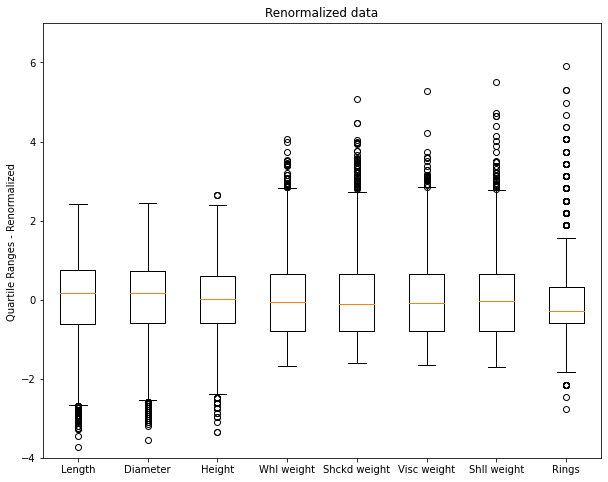

In [8]:
# replot
plot_array3 = abalone2.values
plot.boxplot(plot_array3)
plot.xticks(list(range(1,9)),abalone.columns[1:9])
plot.ylim((-4,+7))
plot.ylabel(("Quartile Ranges - Renormalized "))
plot.title('Renormalized data')

Now we see some new details.  The 0 point on the y-axis is now the mean, and by looking at the placement of the median in the box we can see whether the median is above or below the mean. 

The `Rings` attribute has an outlier that's 6 STD units above the mean.  That's extreme.  If this were IQ, that would be an Einstein; if this were basketball talent, that would be Michael Jordan.  Since we're talking about age, what we have here is a Methusalah among abalones. In other words, that's one **very** old abalone.

## Limitations  of boxplots

Boxplots look at multivariate data one dimension at a time.  You can learn a lot
that way, but there are some things you are not going to learn.

Let's make some fictional data.  I'm going to generate some points that lie
on a line, but not **exactly** on the line, and then I'm going to add in
an outlier. This will be the kind of outlier a boxplot won't show you.



Text(6.8, 2.8, 'A')

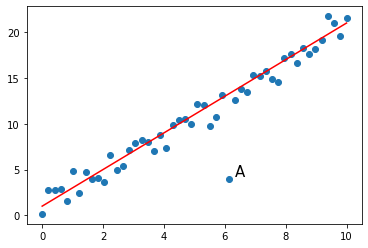

In [9]:
%matplotlib  inline
import numpy as np
import matplotlib.pyplot as plt

N= 50
seed= 47
#outlier_idx = 5
outlier_idx = 20
mu, sigma = 0, 1. # mean and standard deviation for our NOISE
np.random.seed(seed)
noise = np.random.normal(mu, sigma, N)
x = np.linspace(0,10,N)
(m,b) = 2.,1.
# Out well-behaved line
y = m*x + b
#Add the noise to JIGGLE points off the line
yprime = y + noise
# Create an outlier here
yprime[-outlier_idx] = 4
plt.plot(x,y,c="r")
ax = plt.gca()

plt.scatter(x,yprime)
ax.annotate("A", xy = (x[-outlier_idx],yprime[-outlier_idx]),xycoords='data', 
            xytext = (6.8,2.8), textcoords='offset points',
            size=15)
#plt.draw()

Look at the point A.  It is a visual outlier, clearly. Mathematically, the distance from the line far greater than the distance for any other point.  Yet notice that it is **not** an outlier if
we look at  the `x`-values alone or the `y`-values alone.

In [10]:
x[-outlier_idx]

6.122448979591837

In [11]:
print("x min {0:.3f}  max {1:.3f}".format(x.min(), x.max()))
print("y min {0:.3f}  max {1:.3f}".format(yprime.min(), yprime.max()))
print()
print("out:")
print('x {0:.3f}'.format(x[-outlier_idx]))
print('y {0:.3f}'.format(yprime[-outlier_idx]))

x min 0.000  max 10.000
y min 0.152  max 21.742

out:
x 6.122
y 4.000


The box plot for **y** will not show this outlier point as an outlier. It lies well
off the `y`-minimum of -.175 and the `x`-maximum of 20.724

The moral is that when looking at multivariate data, there are some generalizations
you can **only** see by looking at multiple dimensions simultaneously.  And we need
other visualization tools for that purpose.  The picture above shows us that a 2D scatterplot
can in fact show us 2D generalizations. But what applies to 1 dimension versus 2 also applies to 2 versus 3,
and so on.  In multi-dimensional data, when looking at less than the full array
of dimensions, there always the possibility of missing some higher dimensional
generalization.

And that's something to be aware whenever you tell a story using
a graphical simplification.  This is a point emphasized in Tufte (1983), an excellent source
for design principles governing visualization of quantitative data.

# Violin Plots

Note that although violin plots are closely related to Tukey's (1977)
box plots, they add useful information such as the distribution of the
sample data (density trace).

By default, box plots show data points outside 1.5 * the inter-quartile
range as outliers above or below the whiskers whereas violin plots show
the whole range of the data.

A good general reference on boxplots and their history can be found
[here.](http://vita.had.co.nz/papers/boxplots.pdf)

Violin plots require matplotlib >= 1.4.

For more information on violin plots, the scikit-learn docs have [a great
section.](http://scikit-learn.org/stable/modules/density.html)

Here's a nice demonstration of the basic idea, contrasting what a violin
plot gives you with what a boxplot gives you, on some random data.

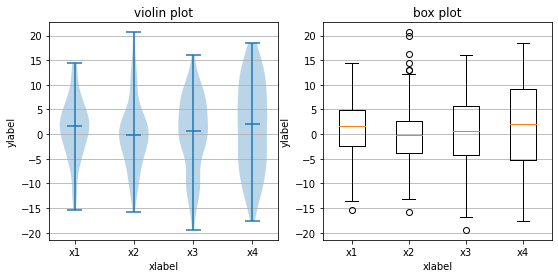

In [12]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# generate some random test data
all_data = [np.random.normal(0, std, 100) for std in range(6, 10)]

# plot violin plot
axes[0].violinplot(all_data,
                   showmeans=False,
                   showmedians=True)
axes[0].set_title('violin plot')

# plot box plot
axes[1].boxplot(all_data)
axes[1].set_title('box plot')

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y+1 for y in range(len(all_data))])
    ax.set_xlabel('xlabel')
    ax.set_ylabel('ylabel')

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=['x1', 'x2', 'x3', 'x4'])
#plt.savefig('box_viol_plot_example.png')
plt.show()

Below we've loaded the image created by saving one particular run of the above code.  Because random
sampling is used, the pictures created will vary slightly each time you execute the code.


![boxplot_violin_example.png](https://drive.google.com/uc?export=view&id=1R_LlQl9Gd8txKb-wHX89Odhk70zaraZm)
  
![box_viol_plot_example.png](attachment:box_viol_plot_example.png)

The key point to notice is that all the medians (the horizontal midlines shown in both kinds
of plot) are in roughly the same place.  However, that does not mean the population is
concentrated around that midline.  Notice that the violin plot on the left shows that, for `x3` the fat part of the violin (the value attracting the greatest number of points) is around -5, while for `x2` the fat part of the violin is near 0. These differences are hinted at in the box plot (the median is further below the mean in `x3`),
but they are not as clearly visualized.

# Abalone data revisited

In [ ]:
import pandas as pd
from pandas import DataFrame
import pylab
#from pylab import *
import matplotlib.pyplot as plot
pd.set_option('display.width',200)

target_url = ("http://archive.ics.uci.edu/ml/machine-"
              "learning-databases/abalone/abalone.data")
#read abalone data.  This file has no column names (header = None),
# so we provide them ourselves.
abalone = pd.read_csv(target_url,header=None, prefix="V")
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whl weight',
                   'Shckd weight', 'Visc weight', 'Shll weight',
                   'Rings']
summary = abalone.describe()
# We start by making a copy of the original data frame, minus the sex attribute.
abalone2 = abalone.iloc[:,1:9]
# We'll iterate through each attribute, and for each attribute we'll change all the rows at once.
for i in range(8):
    # Grab the mean and std of attribute i
    mean = summary.iloc[1, i]
    std = summary.iloc[2, i]
    # LHS: what's being changed, RHS, what it's changing to.
    # We convert to STD units, distance from mean divided by STD
    abalone2.iloc[:,i:(i + 1)] = (
              abalone2.iloc[:,i:(i + 1)] - mean) / std
#abalone2 = abalone.iloc[:,1:9]
plot_array3 = abalone2.values

Text(0.5, 1.0, 'Violin Plot')

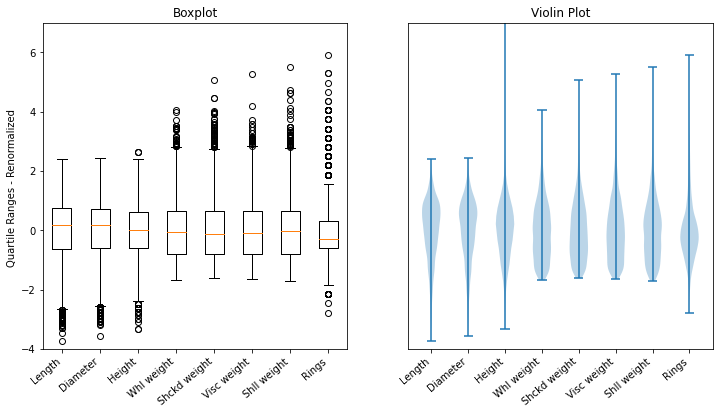

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
figure = plt.figure(figsize=(12,6))
# Make the figures big enough for the optically challenged.
#pylab.rcParams['figure.figsize'] = (10.0, 8.0)
# We start by making a copy of the original data frame, minus the sex attribute.
#replot
plot.subplot(121)
plot.boxplot(plot_array3)
plot.xticks(range(1,9),abalone.columns[1:9],rotation=40,ha='right')
#axes[0].boxplot(plot_array3)
#axes[0].set_xticks(range(1,9))
#axes[0].set_xticklabels(abalone.columns[1:9],rotation=45,ha='right')
plot.ylim((-4,+7))
plot.ylabel(("Quartile Ranges - Renormalized "))
plot.title('Boxplot')
#axes[0].boxplot(plot_array3)
plot.subplot(122)
#axes[1].xticks(range(1,9),abalone.columns[1:9])
#plot.xticks(range(1,9))
plot.xticks(range(1,9), abalone.columns[1:9],rotation=40,ha='right')
plot.ylim((-4,+7))
plot.yticks([],[])
#axes[1].set_ylabel(("Quartile Ranges - Renormalized "))
plot.violinplot(plot_array3)
plot.title('Violin Plot')

## Homework questions

1. In the abalone data, explain why the numbers on the y-axis have changed between the plot labeled "Independent variables" and the plot labeled "renormalized data".  What attributes have medians that are above the mean?
2. State in your own words what it means that the horizontal bar on the lower whisker is placed so high on the weight attributes? [Hint: Look at those attributes in the plot labeled 'Independent Variables'.]
3. Propose a verbal explanation for why the median is below the mean for the 'Rings' attribute.  In other words, what
   fact about abalone shells does this represent? [Hint: Remember what the value of the rings attribute tells us.]
   Compare this case to the case of the fictional housing market discussed in our normal distribution notebook.
4. The next cell shows the box plot for some new data, showing clause lengths in the plays of Seneca. 
   The data has not been renormalized.  The units on the y-axis are, roughly, syllables; 12 syllables is one line. 
   Answer the following questions.
   1.  For each play, estimate what percentage of the clauses fall at or below the median clause length.
   2.  For each play, estimate what percentage of the clauses have a length of 12 or less.
   3.  Plays Pha (*Phaedra*) and Oct (*Octavia*) have the same median clause length (the red line), but the red  lines 
       are placed differently in the box.  Explain what that means.

![seneca_clause_lengths.png](https://drive.google.com/uc?export=view&id=1E6AnpQdwfpw-CVpwRdUbQ1Iu9oFoPu5J)

## References

McGill, R., Tukey, John W., and Larsen, W. A. 1978. *The American Statistician*. Vol. 32, No. 1, Feb., 1978, pp. 12-16.

Tufte, E. R. 1983. The visual display of quantitative data. Cheshire, CT: Graphics.

Tukey, John W. 1962. The Future of Data Analysis. Ann. Math. Statist. 33, no. 1, pp. 1--67. doi:10.1214/aoms/1177704711. http://projecteuclid.org/euclid.aoms/1177704711.


